# Best Neighborhood in Pittsburgh Final Project
## Madeline Fontana's Project Notebook

In [1]:
import pandas as pd
%matplotlib inline

**This notebook looks at two data sets analyzing City of Pittsburgh parks, courts, and rinks to determine the best neighborhood in Pittsburgh. Our group's criteria for best neighborhood is the best neighborhood for children. This will be determined on multiple factors including amount of local parks, courts, and rinks, and the types of of each of these items. My partner will also be analyzing information about playgrounds and playground equipment best suited for children. Neighborhoods will be ranked based on certain criteria. The best neighborhood will be a neighborhood with plenty of access to parks, courts, rinks, and playgrounds, and the best quality locations for each. The best neighborhood will be great for promoting exercise, healthy habits, and emotional well being for children. Notice that some parks overlap neighborhoods. For this particular analysis, we have chosen to ignore this piece of information.**

## **City of Pittsburgh Parks**

**First, I read in the City of Pittsburgh Parks data set and took a sample of 10 values from the data set.**

In [2]:
#Read in Data
parks_data = pd.read_csv("cityofpghparks.csv")
parks_data.sample(10)

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
134,1541827179,Morrow Triangle Park,Park,Parks - Northeast,https://tools.wprdc.org/images/pittsburgh/park...,Bloomfield,7,8,42003080600,2,8,5,3-23,40.456564,-79.938937
43,564546832,Davis Park,Park,Parks - Eastern,NaN,Squirrel Hill South,5,14,42003141300,3,14,4,2-21,40.432365,-79.924957
196,1849203338,West End-Elliott Overlook Park,Park,Parks - Western,NaN,Elliott,2,20,42003562600,5,20,6,1-17,40.446332,-80.033703
72,809676292,Four Mile Run Park,Park,Parks - Schenley,NaN,Greenfield,5,15,42003151600,3,15,4,2-12,40.427551,-79.949468
31,1899722366,Buhl Community Park at Allegheny Square,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.452447,-80.005828
87,1264215460,Harris Triangle,Traffic Island/Median,3rd Division,NaN,North Oakland,6,5,42003562000,3,5,4,2-23,40.456040,-79.954771
139,1063708324,Negley-Collins Triangle,Traffic Island/Median,2nd Division,NaN,East Liberty,9,11,42003111300,2,11,5,3-8,40.466415,-79.918852
177,571208483,Swisshelm War Memorial,Monument/Memorial,3rd Division,NaN,Swisshelm Park,5,14,42003141100,3,14,4,2-19,40.420715,-79.899837
15,1353792888,Banksville Park,Park,Parks - Western,NaN,Banksville,2,20,42003202300,5,20,6,4-9,40.414295,-80.038760
98,789893248,Joe Natoli Park,Park,Parks - Northeast,NaN,Morningside,7,10,42003101400,2,10,5,3-7,40.483824,-79.925777


**Next, I performed some data analysis on the data set. Here I created a data frame that contained all of the neighborhoods with no repeats and their cooresponding number of parks in each neighborhood. Here is a sample of 20 neighborhoods from this data frame. I used `.value_counts()` to find these values.**

In [3]:
#Parks Per Neighborhood

parks_values = parks_data['neighborhood'].value_counts()
parks = pd.DataFrame(parks_values)
parks.sample(20)

,neighborhood
Greenfield,3
Lincoln Place,2
Regent Square,1
Crafton Heights,2
West Oakland,1
Spring Garden,2
Garfield,3
Arlington,1
Central Oakland,4
Carrick,3


**Here are the top neighborhoods and the amount of parks in each neighborhood.**

In [4]:
parks.head(12)

,neighborhood
East Liberty,12
Central Business District,10
Beechview,8
South Side Slopes,7
Point Breeze,7
Squirrel Hill South,6
Mount Washington,6
Sheraden,6
Hazelwood,6
South Side Flats,6


**Next, I performed a statistical analysis of the data frame I created. The average number of parks per neighborhood was 2.86 so about 3 parks per neighborhood. The maximum number of parks per neighborhood was 12 parks.**

In [5]:
#Statistical Analysis of Data
parks.describe()

,neighborhood
count,73.000000
mean,2.863014
std,2.206777
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,12.000000


**Here I generated a sample graph containing 6 random neighborhoods and each neighborhood's number of parks. Run this multiple times to get an idea for how neighborhoods compare.**

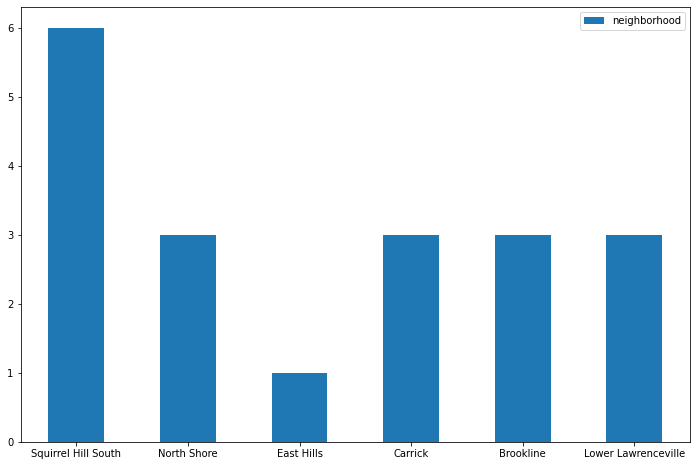

In [6]:
#Sample Graph
#parks = pd.Series(quantities, index=neighborhoods)

parks.sample(6).plot.bar(rot=0, figsize=[12,8])

**Here I generated a graph of the top neighborhoods and the amount of parks in each.**

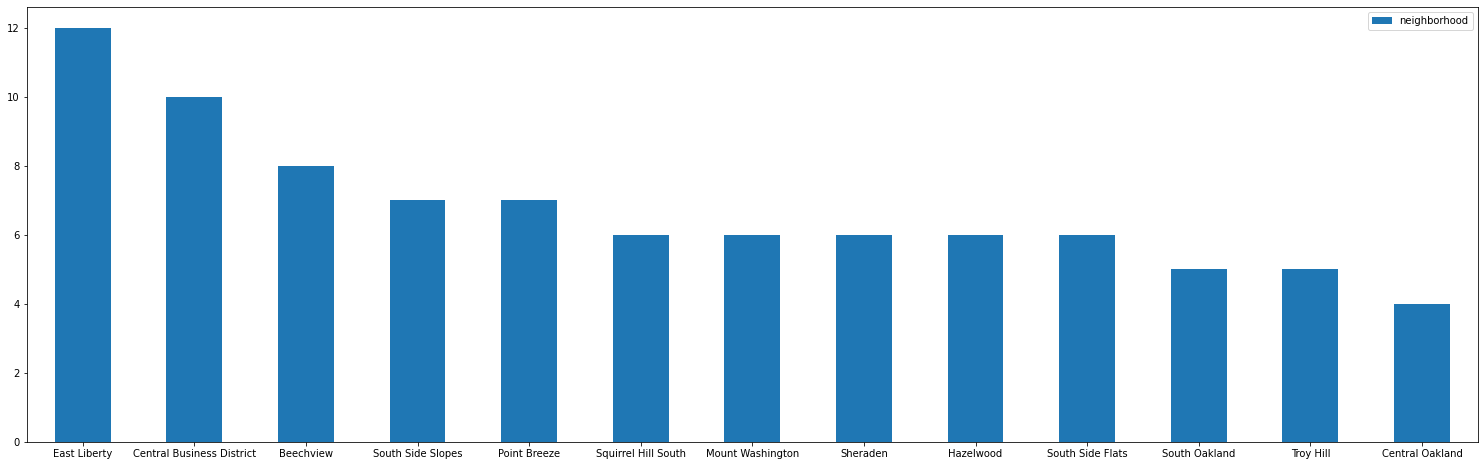

In [7]:
#Top Neighborhoods Graph
parks.head(13).plot.bar(rot=0, figsize=[26,8])

**Neighborhoods with Most Parks Ranking**
1. **East Liberty**
2. **Central Business District and Point Breeze North**
3. **Beechview**
4. **South Side Slopes and Point Breeze**
5. **South Side Flats, Hazelwood, Squirrel Hill South, Mount Washington, and Sheraden**
6. **South Oakland and Troy Hill**

**Here is a line graph showing the entire data set. Notice how the values 12 and 10 and outliers being that most neighborhoods do not have that many parks. Also notice how many neighborhoods have a value centering around 5 and 3, showing that many neighborhoods on average have a range from about 2 to 5 parks.**

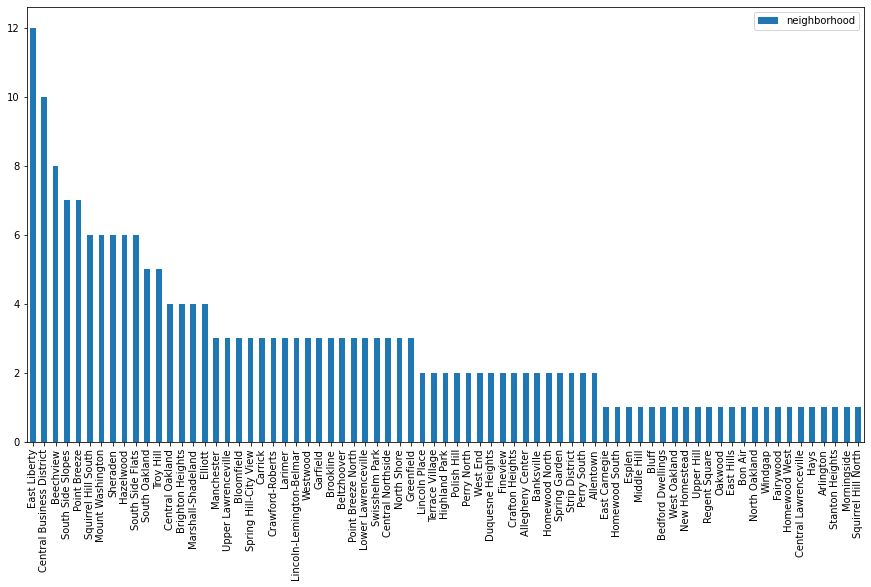

In [8]:
#Entire Data Set Graph
parks.plot.bar(figsize=[15,8])

**However, after analyzing this data set, I noticed that some of the parks listed were not traditional parks, so I analyzed this as well.**

In [9]:
#Number of Each Type of Park 

type_values = parks_data['type'].value_counts()
types = pd.DataFrame(type_values)
types.head(10)

,type
Park,153
Traffic Island/Median,33
Building Grounds,10
Monument/Memorial,7
Open Space,6


**Here is a graph showing how many of each type of park there is in the data set.**

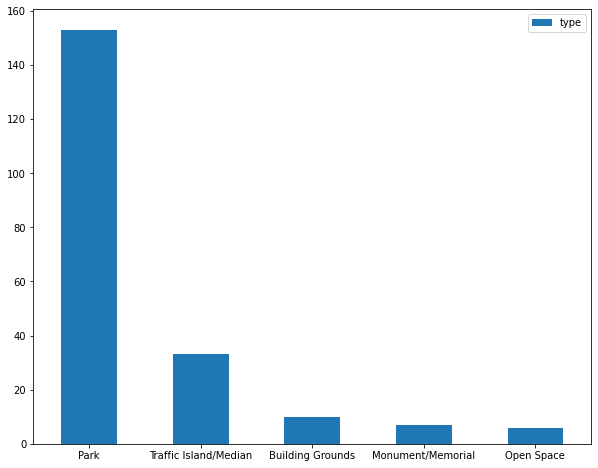

In [10]:
types.plot.bar(rot=0, figsize=[10,8])

**Now let's analyze on a broader scale what may be the best region to live in, and what neighborhoods are in that region.**

**I chose to look at what region the park was in to locate which regions had the most parks in them, so that choosing a neighborhood in a region with many parks would mean that nearby neighborhoods would also have many parks, even further expanding access to parks for children. If a neighborhood is in a top region (a region with many parks), this neighborhood is a great location for children to be in. An example of how this factor could be evaluated is if a neighborhood had a decent amount of parks but was in a region without that many parks (meaning not many parks are around the neighborhood), this might not be the best neighborhood to choose for children.**

In [11]:
#Regions

region_values = parks_data['maintenance_responsibility'].value_counts()
regions = pd.DataFrame(region_values)
top_regions = regions.head(5)
top_regions

,maintenance_responsibility
Parks - Northern,39
Parks - Western,32
Parks - Southern,29
Parks - Northeast,25
Parks - Schenley,23


**The Parks-Northern region has the most parks in it with 39 parks being in that region. Next, I found which neighborhoods are in the top five regions listed.**

In [36]:
parks_data2 = pd.read_csv("cityofpghparks.csv",usecols=['neighborhood','maintenance_responsibility'])
df_parks = parks_data2.head(60)
df_parks.head(20)

,maintenance_responsibility,neighborhood
0,Parks - Southern,Beechview
1,Parks - Schenley,Crawford-Roberts
2,Parks - Northern,North Shore
3,Parks - Northern,Allegheny Center
4,Parks - Northern,North Shore
5,Parks - Northern,Central Business District
6,Parks - Northern,Central Northside
7,Parks - Southern,Beechview
8,2nd Division,East Liberty
9,Parks - Schenley,Bedford Dwellings


**Here I am using `.groupby()` and `.value_counts()` on the data frame with both region and park counts to figure out which top neighborhoods are in top regions.**

**Note that while forming a ranking I examined more of the data than the subset shown.**

In [35]:
df_parks.groupby(['maintenance_responsibility','neighborhood']).value_counts()

maintenance_responsibility  neighborhood             
2nd Division                East Liberty                 2
3rd Division                Central Business District    1
                            Point Breeze                 1
                            South Oakland                2
4th Division                Brookline                    1
5th Division                Beechview                    1
6th Division                Central Business District    1
Parks - Eastern             East Hills                   1
                            East Liberty                 1
                            Hazelwood                    1
                            Homewood North               1
                            Homewood West                1
                            Squirrel Hill South          1
Parks - Northeast           East Liberty                 1
                            Lincoln-Lemington-Belmar     1
                            Lower Lawrenceville          1
  

**Here I have shown which top neighborhoods are in top regions. Top neighborhoods are neighborhoods ranked for having a lot of parks and top regions are regions with a lot of parks.**

**Notice that regions 'Parks - Southern' and 'Parks - Schenely' (regions 3 and 5) have the most top neighborhoods in them, making them the best regions to live in. After analyzing the data based on region, I established a new ranking based on most top neighborhoods in top regions using parks per neighborhood counts to break ties.**

**New Ranking**
1. **Beechview**
2. **South Side Slopes**
3. **South Side Flats**
4. **Hazelwood**
5. **Squirrel Hill South**
6. **South Oakland**
7. **Central Business District**
8. **Mount Washington**
9. **Sheraden**
10. **Troy Hill**
11. **East Liberty**

**Notice how much of a drastic change there was in the ranking when we base the ranking on best regions. East Liberty, who was ranked first when only looking at most parks, is now in last because it is not in a top region (meaning a region with a lot of parks). Beechview still is ranked high, and both the South Side Flats and Slopes moved up in the ranking slightly.**

### **Summary of City of Pittsburgh Parks Data Set**

**The overall winner for this data set is Beechview ranked first and third after performing analysis of two different aspects of the data set and forming a general conclusion. Beechview has 8 parks, ranked third in the ranking based of amount of parks and ranked first in the ranking based on region. Beechview could be considered a good neighborhood to live in and a good neighborhood for chidlren based on access to many parks of different types and for being in a region with many parks.**

## **City of Pittsburgh Courts and Rinks**
**First, I read in the City of Pittsburgh Courts and Rinks data set. Here is a sample of 10 entires in this data set.**

In [14]:
#Read in Data
courts_rinks_data = pd.read_csv("cityofpghcourtsandrinks.csv")
courts_rinks_data.sample(10)

,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
208,182857077,Wabash Park Basketball Court 2,Basketball (Full),Wabash Park,NaN,Asphalt,0,f,West End,2,20,42003562600,5,20,6,1-17,40.438175,-80.034126
163,1324077535,Oakwood Park Tennis Court 1,Tennis,Oakwood Park,NaN,Asphalt,0,f,Oakwood,2,28,42003562800,5,28,6,1-19,40.426372,-80.066449
65,1573467860,Fineview Park Tennis Court 1,Pickleball,Fineview Park,NaN,Asphalt,0,f,Fineview,1,25,42003250900,1,25,1,1-10,40.461608,-80.004102
206,2034927516,Vincennes Park Basketball Court 1,Basketball (Full),Vincennes Park,NaN,Asphalt,0,f,Middle Hill,6,5,42003050100,3,5,2,2-5,40.451205,-79.967705
161,779686783,Niagara Park Basketball Court 1,Basketball (Half),Niagara Park,NaN,Asphalt,0,f,South Oakland,3,4,42003040900,3,4,4,2-10,40.434632,-79.960296
23,1919204105,Brighton Heights Park Basketball Court 1,Basketball (Full),Brighton Heights Park,NaN,Asphalt,0,f,Brighton Heights,1,27,42003270800,1,27,1,1-14,40.487497,-80.031773
15,1083188111,Arsenal Park Tennis Court 3,Tennis,Arsenal Park,NaN,Asphalt,0,f,Lower Lawrenceville,7,6,42003060300,2,6,2,3-3,40.465902,-79.960882
48,2034859154,East Carnegie Park Basketball Court 1,Basketball (Full),East Carnegie Park,NaN,Asphalt,0,f,East Carnegie,2,28,42003562800,5,28,6,1-19,40.414503,-80.074882
225,1066241176,Moore Park Pickleball Court 2,Pickleball,Moore Park,NaN,NaN,0,f,Brookline,4,19,42003191700,5,19,6,4-26,40.404821,-80.014735
63,1535096593,Fifty-Seventh Street Park Basketball Court 1,Basketball (Full),Fifty-Seventh Street Park,NaN,Asphalt,0,f,Upper Lawrenceville,7,10,42003101100,2,10,2,3-5,40.485950,-79.946910


**Next, I found how many courts/rinks were in each neighborhood using `.value_counts()`. Here is a sample of 20 neighborhoods and the amount of courts/rinks in each.**

In [15]:
#Courts and Rinks Per Neighborhood

courts_values = courts_rinks_data['neighborhood'].value_counts()
courts_and_rinks = pd.DataFrame(courts_values)

courts_and_rinks.sample(20)

,neighborhood
East Liberty,6
Brighton Heights,2
Lincoln-Lemington-Belmar,2
Oakwood,3
Bedford Dwellings,2
Upper Lawrenceville,2
New Homestead,2
Hays,1
Allegheny Center,9
Upper Hill,1


**Here is the top 8 neighborhoods with the most courts/rinks with some neighborhoods forming a tie for the amount of courts/rinks. From this I found the top 6 rankings for most courts/rinks per neighborhood.**

In [16]:
courts_and_rinks.head(8)

,neighborhood
Squirrel Hill South,26
Highland Park,20
Hazelwood,10
Beltzhoover,9
Brookline,9
Allegheny Center,9
Troy Hill,8
Beechview,7


**Next, I performed a statistical analysis of the data frame using `.describe()`. Notice that the average number of courts/rinks is 3.9, so about 4 courts/rinks per neighborhood. The maximum number of courts/rinks per neighborhood is 26 courts/rinks.**

In [17]:
courts_and_rinks.describe()

,neighborhood
count,63.000000
mean,3.904762
std,4.260525
min,1.000000
25%,2.000000
50%,2.000000
75%,5.000000
max,26.000000


**Next, I put the top neighborhoods and top quantities into lists and then a Series and then plotted this Series using a bar chart, showing the amount of parks in each of these top neighborhoods. Squirrel Hill South has the most courts/rinks with 26 courts/rinks.**

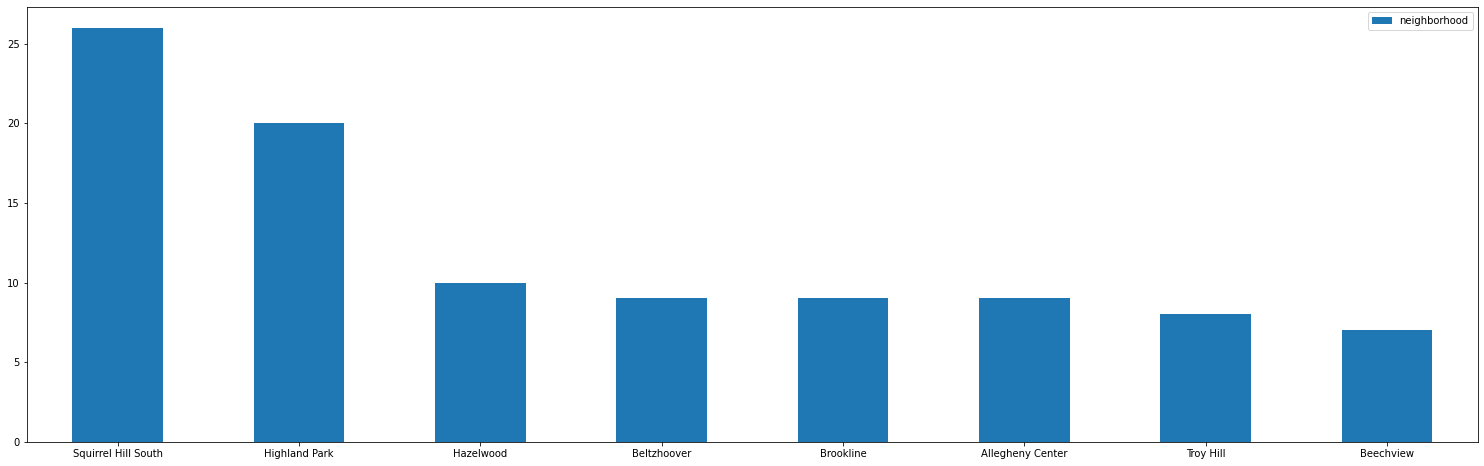

In [18]:
#Top Neighborhoods Graph
top_n2 = ['Squirrel Hill South','Highland Park','Hazelwood','Brookline','Allegheny Center','Beltzhoover','Troy Hill','Beechview']

courts_and_rinks.head(8).plot.bar(rot=0, figsize=[26,8])

**Neighborhoods with the Most Courts/Rinks Ranking**
1. **Squirrel Hill South**
2. **Highland Park**
3. **Hazelwood**
4. **Brookline, Allegheny Center, and Beltzhoover**
5. **Troy Hill**
6. **Beechview**

**Afer forming this ranking, I wanted to analyze a different aspect of this data set. I found the amount of each type of court or rink there is in the City of Pittsburgh. The most common type is a Basketball (Full) court, with the City of Pittsburgh having 88 Basketball (Full) courts.**

In [19]:
#Number of Each Type of Court/Rink 

court_types = courts_rinks_data['type'].value_counts()
types = pd.DataFrame(court_types)

types

,type
Basketball (Full),88
Tennis,73
Basketball (Half),23
Hockey,14
Pickleball,12
Street Hockey,8
Bocce,8
General Sports,6
Dek Hockey,5
Volleyball,5


**Here are the top five types of court/rink in the data set.**

In [20]:
types.head(5)

,type
Basketball (Full),88
Tennis,73
Basketball (Half),23
Hockey,14
Pickleball,12


**Here is a graph containing all of the different types of court/rink nad how many of each are in the data set.**

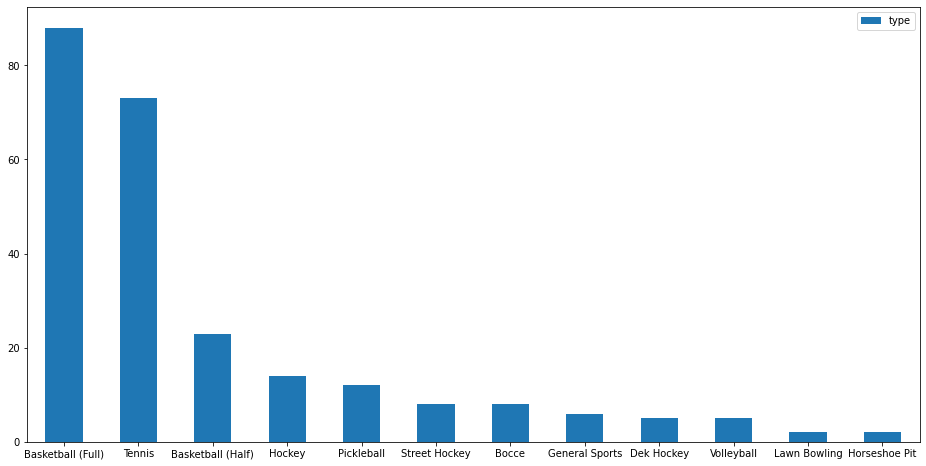

In [21]:
#Types of Court/Rink Graph

types.plot.bar(rot=0, figsize=[16,8])

**Here is a graph of the top five types of court or rink in the City of Pittsburgh.**

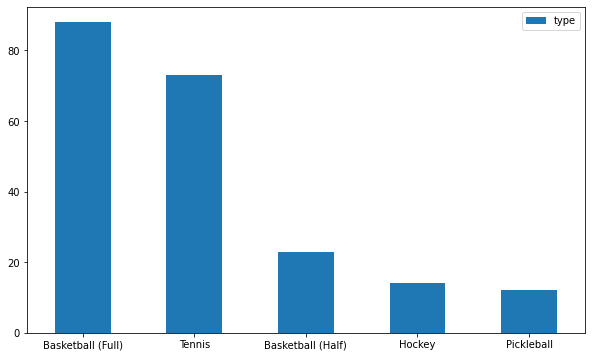

In [22]:
types.head(5).plot.bar(rot=0, figsize=[10,6])

**Using the information I collected about the most commo types of court or rink, I put the neighborhoods into categories based on which type of court or rink a neighborhood has.**

In [32]:
#Neighborhoods With Each Type of Court/Rink
courts_data2 = pd.read_csv("cityofpghcourtsandrinks.csv",usecols=['neighborhood','type'])
df_courts = courts_data2.head(60)
df_courts.head(20)

,type,neighborhood
0,Basketball (Full),Allegheny Center
1,Tennis,Allegheny Center
2,Tennis,Allegheny Center
3,Tennis,Allegheny Center
4,Basketball (Half),Beechview
5,Basketball (Full),Beechview
6,Basketball (Full),Bedford Dwellings
7,Basketball (Full),Bedford Dwellings
8,Basketball (Full),South Side Slopes
9,Basketball (Full),South Side Flats


**After looking at all the neighborhoods, I then found which top neighborhoods from the earlier ranking were in each of the top court or rink types.**

**Here I am using `.groupby()` and `.value_counts()` on the data frame with both type and court/rink counts to figure out which top neighborhoods are in top types.**

In [30]:
#Top Neighborhoods in Top Court/Rink Types
df_courts.groupby(['type','neighborhood']).value_counts()

type               neighborhood            
Basketball (Full)  Allegheny Center            1
                   Allentown                   1
                   Banksville                  1
                   Bedford Dwellings           2
                   Beechview                   1
                   Brighton Heights            1
                   Brookline                   1
                   Crafton Heights             1
                   East Carnegie               1
                   East Hills                  2
                   East Liberty                1
                   Hazelwood                   2
                   Homewood West               1
                   Lincoln-Lemington-Belmar    1
                   Lower Lawrenceville         1
                   Mount Washington            2
                   South Side Flats            1
                   South Side Slopes           2
                   Squirrel Hill South         2
                   Troy H

**Note that here is only a section of the data, I examined more data than this to formulate a ranking.**

**Notice that most top neighborhoods have Basketball (Full) and Tennis courts (court/rink types 1 and 2). The second most common court/rink type is Basketball (Half) courts/rinks with the second most top neighborhoods having that type. Here is a new ranking of neighborhoods based on top court/rink types and most top neighborhoods within them, using amount of courts/rinks in each neighborhood and how many repeats of the neighborhood in top types there are to break ties.**

**New Ranking Based on Court/Rink Types:**
1. **Squirrel Hill South**
2. **Highland Park**
3. **Hazelwood**
4. **Allegheny Center and Brookline**
5. **Beltzhoover**
6. **Troy Hill**
7. **Beechview**

**Notice that the ranking did not change very much based on the criteria, with only Beltzhoover moving down a level. Therefore, we could infer that most neighborhoods have common types of courts and rinks, so either ranking of neighborhoods will result in a list of high quality neighborhoods with access to courts and rinks that are also high quality.**

### **Summary of City of Pittsburgh Courts and Rinks**

**Overall winner for this data set is Squirrel Hill South, ranked first place for having the most courts/rinks with 26 court/rinks. Squirrel Hill South has various court types including Basketball (Full), Tennis, Hockey, and Pickle Ball. The most common type of court is a Basketball (Full) court with the City of Pittsburgh having 88 full basketball courts. The average number of courts or rinks per neighborhood is about 4 courts/rinks.**

### My Comparison of the Data Sets

**After analyzing both of these data sets, some neighborhoods appeared in the top rankings of both data sets after performing my analysis. These neighborhoods are Beechview, Hazelwood, Squirrel Hill South, and Troy Hill. These neighborhoods could be considered other good neighborhoods to live in for children because they rank well in access to park and access to courts and rinks. Playing various sports on different courts and rinks and spending time outside in a park is beneficial to children's health and well being.**

**To demonstrate the overlap of the two data sets, I looked at the 'park' column in the courts and rinks data set to see which parks were located in which neighborhoods.**

In [24]:
courts_new_data = pd.read_csv("cityofpghcourtsandrinks.csv",usecols = ['neighborhood','park'])

courts_new_data.sample(10)

,park,neighborhood
70,Frazier Park,South Oakland
139,McBride Park,Lincoln Place
226,Schenley Park,Squirrel Hill South
233,Washington's Landing Park,Troy Hill
63,Fifty-Seventh Street Park,Upper Lawrenceville
137,McBride Park,Lincoln Place
73,Frick Park,Point Breeze
28,Burgwin Park,Hazelwood
1,Allegheny Commons,Allegheny Center
0,Allegheny Commons,Allegheny Center


**Here are the parks most present in the courts and rinks data set and a graph representing this. Highland Park shows up 18 times in the data set, meaning that many of the courts and rinks are located in that park.** 

In [15]:
courts_new_data_values = courts_new_data['park'].value_counts()
new_courts = pd.DataFrame(courts_new_data_values)
new_courts.head(6)

,park
Highland Park,18
Schenley Park,16
Frick Park,13
Allegheny Commons,9
McKinley Park,8
Moore Park,7


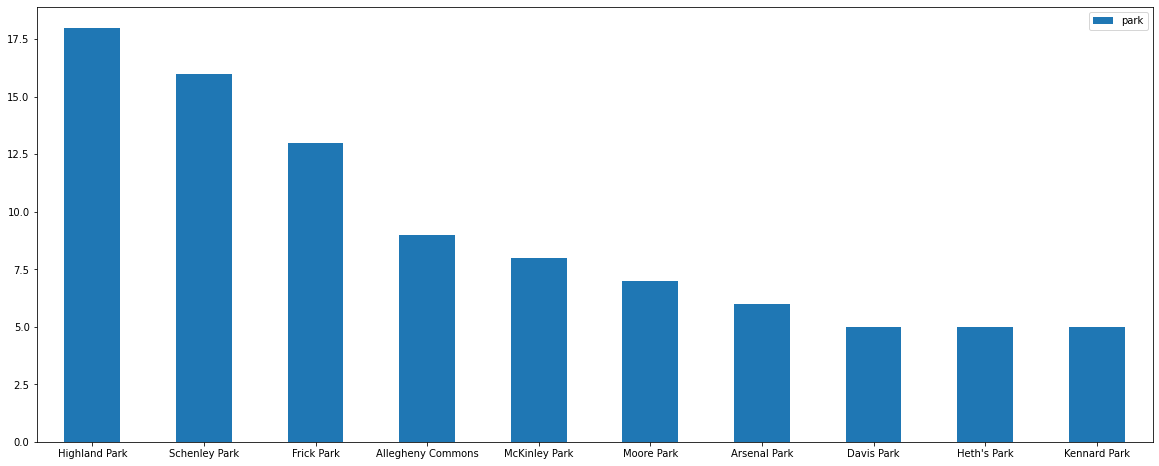

In [16]:
new_courts.head(10).plot.bar(rot=0,figsize=[20,8])

**Highland Park is present the most in the courts and rinks data set, located in the Highland Park neighborhood. Schenley Park is the second most present, overlapping the neighborhoods of Oakland, Squirrel Hill, and Greenfield.**

**Here are the parks that are in the Squirrel Hill South neighborhood using the park column in the courts and rinks data set.**

In [27]:
#Parks in Squirrel Hill South

all_parks = courts_rinks_data.iloc[0:,3]
parknames = []
            
i = 0
for n in all_neighborhoods:
    if n.startswith('Squirrel Hill South') and all_parks[i] not in parknames:
        parknames.append(all_parks[i])
    i += 1
    
print('Parks In Squirrel Hill South:')
print()

for park in parknames:
    print(park)


Parks In Squirrel Hill South:

Davis Park
Frick Park
Schenley Park


### Reflection

**Squirrel Hill South, in the top rankings for every single category, is ranked first overall in both data sets. Squirrel Hill South has 6 parks, ranked fifth by number of parks and by region the parks are in. Squirrel Hill South was also ranked first for both categories I analyzed in the courts and rinks data set with 26 courts/rinks and having 4 different top court/rink types including Basketball (Full), Tennis, Hockey, and Pickleball. I have concluded that based on my two data sets and the analysis I performed, Squirrel Hill South is the best neighborhood to live in. This neighborhood would be great for children with access to many parks, courts, and rinks while also being located in regions and having a multitude of different types of courts and rinks. Squirrel Hill South also contains part of Schenly Park, which showed up quite frequently in the courts and rinks data set. Squirrel Hill South also has Davis Park and Frick Park. This park had 16 different courts or rinks which could be used by children, making Squirrel Hill South a great neighborhood overall.**